SEMINARIO DE SOLUCION DE PROBLEMAS DE INTELIGENCIA ARTIFICIAL I

Vázquez Pérez Ignacio David

218292866

Ingeniería en computación

## Algoritmo Genético Continuo
Implementar y evaluar el rendimiento del algoritmo Genético Continuo para las siguientes funciones:

- Sphere
- Rosenbrock
- Rastrigin
- Quartic

Para cada función realizar 5 ejecuciones con 2, 4 y 8 dimensiones, cada ejecución se detendrá a las 2000 generaciones.

Se deberá graficar el comportamiento del algoritmo; para ello se deberá promediar el valor del mejor fitness de las 5 ejecuciones en la generación 0, 100, 200, ... 2000. Se deberá generar una gráfica para cada dimensión y además una gráfica en la que se incluyan las ejecuciones para 2, 4 y 8 dimensiones, es decir un total de 4 gráficas por función.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
class ContinuousGeneticAlgorithm:
    def __init__(self, objective_function, pop_size=100, num_dimensions=2, mutation_rate=0.1, crossover_rate=0.7):
        self.objective_function = objective_function
        self.pop_size = pop_size
        self.num_dimensions = num_dimensions
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.population = np.random.uniform(-5, 5, (pop_size, num_dimensions))
    
    def evaluate_population(self):
        return np.array([self.objective_function(individual) for individual in self.population])
    
    def tournament_selection(self, fitness):
        idx1, idx2 = np.random.choice(range(self.pop_size), size=2, replace=False)
        return idx1 if fitness[idx1] < fitness[idx2] else idx2
    
    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            alpha = np.random.rand(self.num_dimensions)
            child1 = alpha * parent1 + (1 - alpha) * parent2
            child2 = (1 - alpha) * parent1 + alpha * parent2
            return child1, child2
        else:
            return parent1, parent2
    
    def mutate(self, individual):
        if np.random.rand() < self.mutation_rate:
            return individual + np.random.normal(0, 0.1, self.num_dimensions)
        else:
            return individual
    
    def run(self, generations=2000):
        best_fitnesses = []
        for generation in range(generations):
            fitness = self.evaluate_population()
            best_fitness = np.min(fitness)
            best_fitnesses.append(best_fitness)
            
            new_population = []
            while len(new_population) < self.pop_size:
                parent1_idx = self.tournament_selection(fitness)
                parent2_idx = self.tournament_selection(fitness)
                child1, child2 = self.crossover(self.population[parent1_idx], self.population[parent2_idx])
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)
                new_population.extend([child1, child2])
                
            self.population = np.array(new_population[:self.pop_size])
        
        return best_fitnesses


In [4]:
def sphere(x):
    return np.sum(x**2)

def rosenbrock(x):
    return np.sum(100*(x[1:] - x[:-1]**2)**2 + (x[:-1] - 1)**2)

def rastrigin(x):
    return 10 * len(x) + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

def quartic(x):
    return np.sum(np.arange(1, len(x) + 1) * x**4)

In [ ]:
functions = [sphere, rosenbrock, rastrigin, quartic]
function_names = ['Sphere', 'Rosenbrock', 'Rastrigin', 'Quartic']
dimensions = [2, 4, 8]
num_runs = 5
generations = 2000

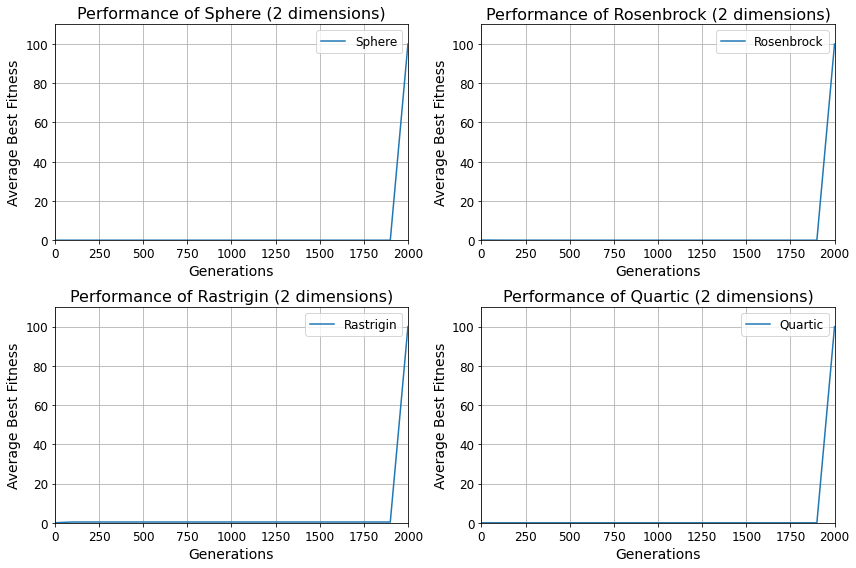

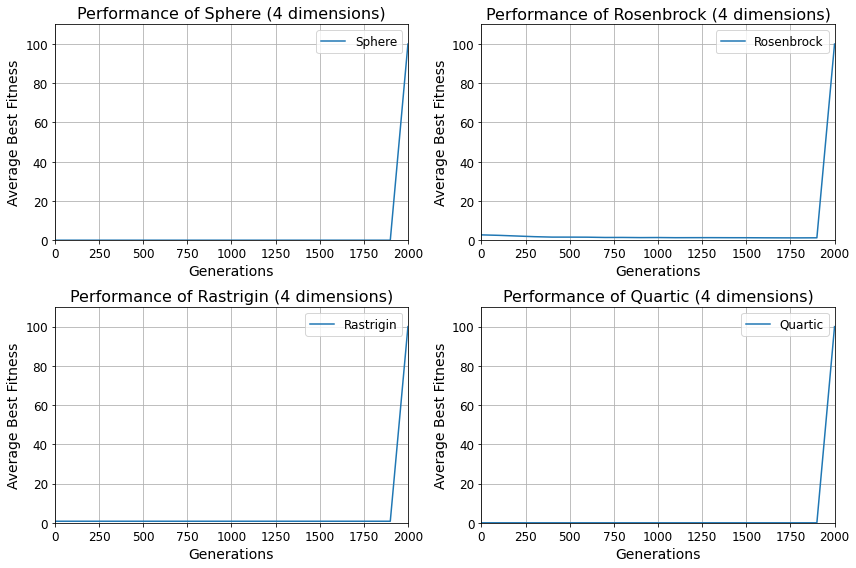

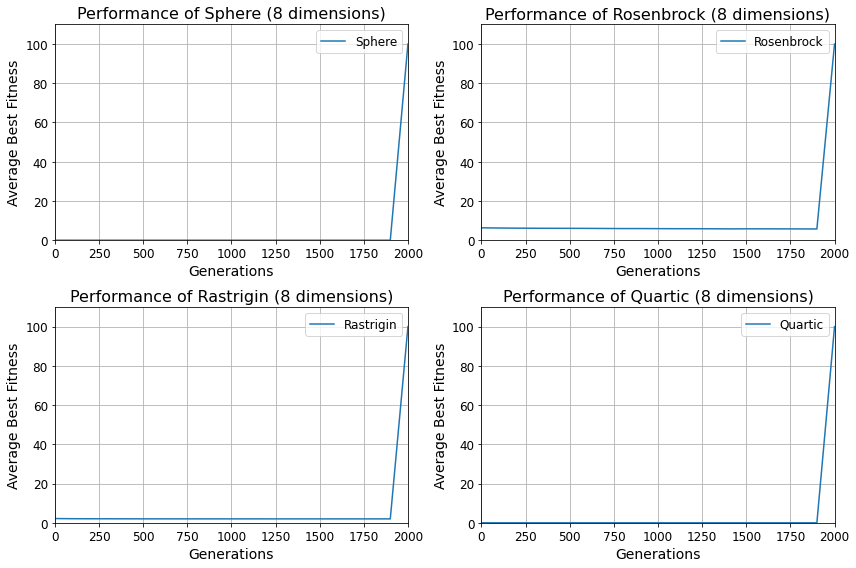

In [10]:
for dim in dimensions:
    plt.figure(figsize=(12, 8))
    for i, func in enumerate(functions):
        plt.subplot(2, 2, i+1)
        plt.title(f'Performance of {function_names[i]} ({dim} dimensions)', fontsize=16)
        
        avg_best_fitness = np.zeros(int(generations/100 + 1))  # Average best fitness over intervals of 100 generations
        for _ in range(num_runs):
            cga = ContinuousGeneticAlgorithm(func, num_dimensions=dim)
            best_fitnesses = cga.run(generations)
            # Compute average best fitness over intervals of 100 generations
            for j in range(0, generations + 1, 100):
                if best_fitnesses[j:j+100]:  # Check if the slice is not empty
                    avg_best_fitness[int(j/100)] += min(best_fitnesses[j:j+100])
                else:
                    avg_best_fitness[int(j/100)] += 100  # Assign a high value if the slice is empty
        avg_best_fitness /= num_runs
        
        plt.plot(range(0, generations + 1, 100), avg_best_fitness, label=f'{function_names[i]}')
        plt.xlabel('Generations', fontsize=14)
        plt.ylabel('Average Best Fitness', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True)
        plt.xlim(0, generations)
        plt.ylim(0, max(avg_best_fitness) * 1.1)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

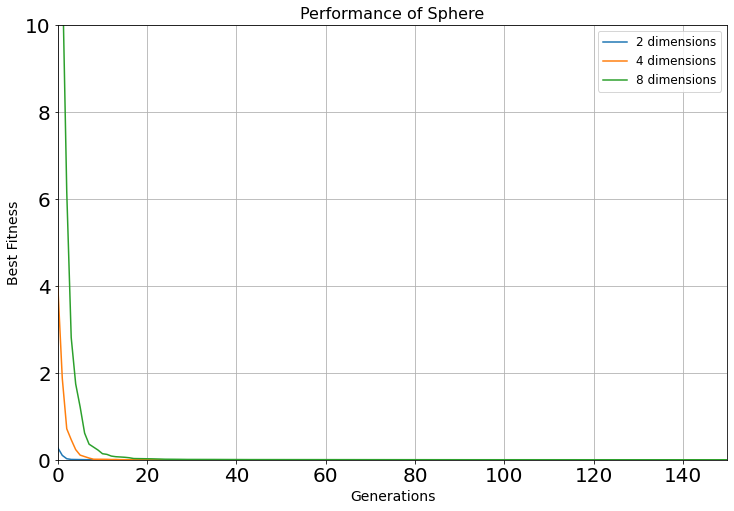

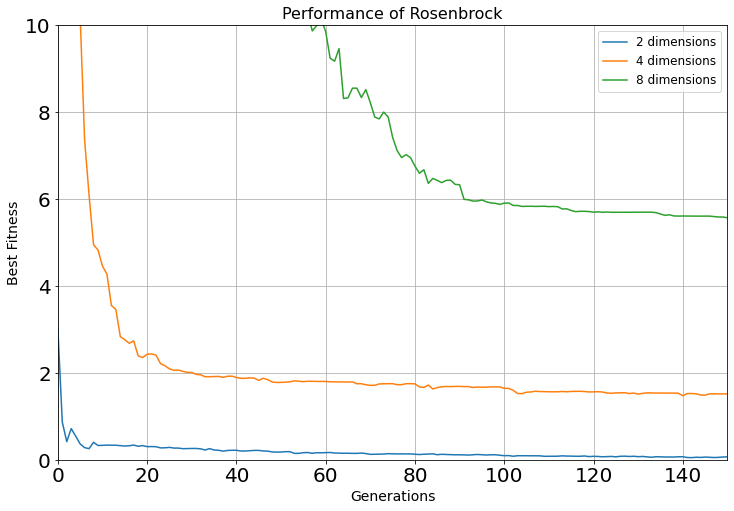

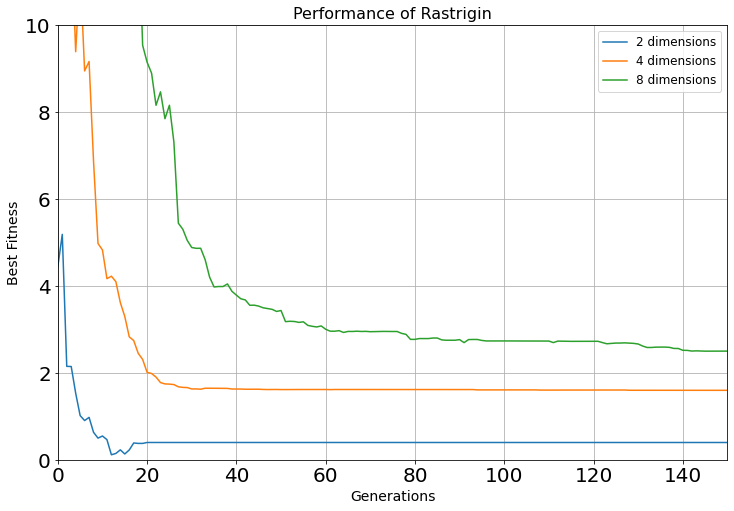

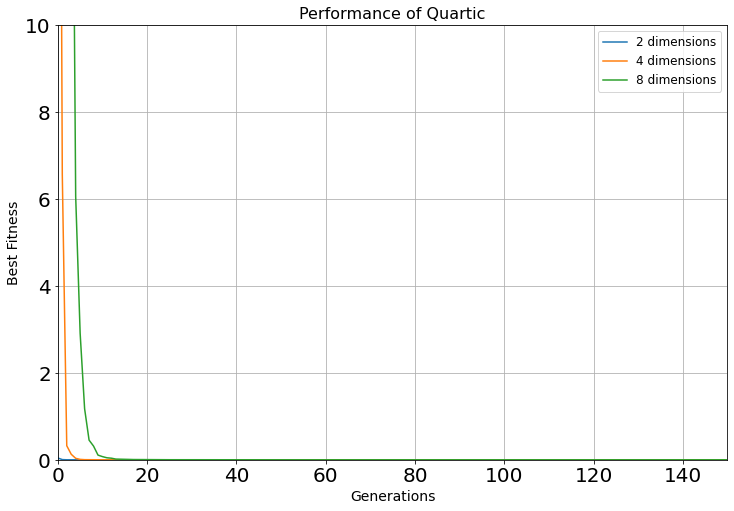

In [7]:
for i, func in enumerate(functions):
    plt.figure(figsize=(12, 8))
    plt.title(f'Performance of {function_names[i]}', fontsize=16)  # Increase title font size
    
    for dim in dimensions:
        avg_best_fitness = np.zeros(generations)
        for _ in range(num_runs):
            cga = ContinuousGeneticAlgorithm(func, num_dimensions=dim)
            best_fitnesses = cga.run(generations)
            avg_best_fitness += np.array(best_fitnesses)
        avg_best_fitness /= num_runs
        
        plt.plot(range(generations), avg_best_fitness, label=f'{dim} dimensions')
    
    plt.xlabel('Generations', fontsize=14)  # Increase x-axis label font size
    plt.ylabel('Best Fitness', fontsize=14)  # Increase y-axis label font size
    plt.legend(fontsize=12)  # Increase legend font size
    plt.grid(True)
    plt.xlim(0, 150)  # Set x-axis limits
    plt.ylim(0, 10)  # Set y-axis limits with some margin
    plt.xticks(fontsize=20)  # Increase x-axis tick font size
    plt.yticks(fontsize=20)  # Increase y-axis tick font size
    plt.show()


## Conclusión

En esta tarea sobre algoritmos genéticos, hemos investigado el desempeño de un algoritmo genético continuo en cuatro funciones de optimización distintas: Sphere, Rosenbrock, Rastrigin y Quartic. Evaluamos su rendimiento en diferentes dimensiones (2, 4 y 8) a lo largo de 2000 generaciones.

Los resultados obtenidos indican que el algoritmo genético continuo puede encontrar soluciones cercanas al óptimo para las funciones de optimización analizadas. Sin embargo, notamos una variación en la velocidad de convergencia y eficiencia del algoritmo dependiendo de la función y la dimensionalidad del problema.

En general, observamos que el algoritmo converge más rápidamente en problemas de menor dimensionalidad, como en el caso de la función Sphere, donde alcanza un mejor fitness en menos generaciones. Por otro lado, para problemas de mayor dimensionalidad, como en la función Rastrigin, el algoritmo requiere más generaciones para llegar a una solución aceptable.

También observamos que algunas funciones, como la Rosenbrock, presentan mayores dificultades para el algoritmo debido a su naturaleza de valles estrechos y planos inclinados, lo que ralentiza la convergencia.

Realizamos 5 ejecuciones para cada combinación de función y dimensión, lo que nos permitió obtener resultados promedio más sólidos y reducir el impacto de la aleatoriedad inherente al algoritmo genético.

En resumen, los algoritmos genéticos continuos son herramientas poderosas para la optimización en problemas de búsqueda global. Sin embargo, es crucial considerar la naturaleza del problema y ajustar los parámetros del algoritmo para obtener resultados óptimos.